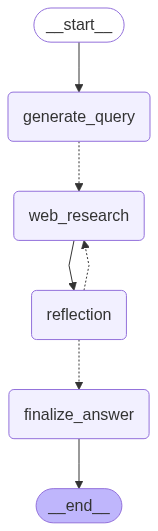

In [ ]:
from IPython.display import Image, display

from search_agent import graph

# draw_mermaid方法可以打印出Graph的mermaid代码。
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
from search_agent import graph

state = graph.invoke(
    {
        "messages": [{"role": "user", "content": "详细介绍GSPO和GRPO的区别"}],
        "max_research_loops": 3,
        "initial_search_query_count": 3,
        "reasoning_model": "gemini-2.5-pro",
    }
)


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised RetryError: Timeout of 600.0s exceeded, last exception: 503 failed to connect to all addresses; last error: UNKNOWN: ipv4:142.250.77.10:443: socket is null.


KeyboardInterrupt: 

In [ ]:
state

NameError: name 'state' is not defined

In [ ]:
from IPython.display import Markdown

Markdown(state["messages"][-1].content)


Spain won the UEFA Euro 2024 tournament [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGFcidniPKtBR-_QjSR1P1Oathq_0T9FTwfpCAWZxbXsroItHQU8zRcyOPDgMcvsWoD2fEnwYFKwanV18ep2_cyS5BlHF6-OFNsijWb-peAgsgLAVRiubekRnzMugsYtiWrhZyO3Q==) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHh_4hBL0Giyuw_cyfT8m7tUSnMqBqH4Lis1CtJICPJNGGLhT6PADTIoUtrj3Rl5qcKNE9T6rzOmedAER_gxJOBDrCF8pnr9lUvhYvmDJxYCJzELkE5rTap4dx6FzOIKZKm1QBp5aHXzd_LCkSTV9ag7Q1A6_t8Vjdbskch6ZG3BoIfjYDQSPgRKDNFAAwt5J07cVFV5pDQzggmM7pxwsUz4drz) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGd9ZQky3X7RQLbTs6mY1i4Pg7ppcI5H_vtxpvQPiEyD8Qw0f7hjvn3QeoOeAVcCG_pEt5Aeu8ofWCgjwQy4_u6qU-NOOJsYPWOW94XcvtkmKiv46vbNkJF-Mb4OpvBztrDa28BfIdCGHdfF9o=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGZc-qDhRx_v3mPelXEfAVmWCpNTa_rzUKundc0pRc7PlTgppymao-_wO7O1oPaAhJYLcZkazIg8T5jA6t9OGgOxUd_Vl88BjouHsot0OK8TlM5hmPf4ECMWGeJthqVwndE3h4wdQ==) [uefa](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG1Lj9FnmuckfU0k1NC_ThQBZVxFCppp4tPl4FCcM3JZGF9aPvn9ZNFUo0fLfqw4Adt63Cdv8thcFSbsBRcf3rj1sz4LALJvrGfh6OayGo0KJ-UEKmKoOz8cxj5nIILCzKjFh2_0ZgTwrf1pkhhYbnWqj2E8hrVN4S5_sxvlCpLXPxjTsE4R0gYKXH_utqqm1NBkpl3p-C9v6kz-zm6V-JJoePAppIXFICF0DMYjOIBA9Mj0z4yO9Y9Tdgx2oaP) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFY5CRvcfjdkBz3h8Md_PscguyZ7LtYrxeHHP3eagcmIOnjaMyZbOHFqUAsa2cgkwvb26FZTvGiRgLKNLfiAsH1oP-5kGwnL6Ejhm4ZXhWGg0R3yE_8zkIKde4RgjIXlBvQW4kZ-LI5yhag-ESoh771z6hob8AigAVXT7WeWABMlQNfcbyG_UZIkqAs18U5e6to44ruNbSyDIyd5gobsVpEmdU256oVxa9d7co=) [coachesvoice](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHxgpkZWF64tZ8-iypkI2fiFi2cpsj4AFjZXkcYUzf5hSOWYb5etIbCoZd_L6zDJi6mWWisxAO6T5V4T8H7XiRow6dmVqXpSEIKhPSdG0HAQbQK74lwxeV_uXx9fSPllIKPOs2tFNRqTuHdJBNcwpcJp6MJbVLEskyhYnWlyOd9ouQv) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEV-g6Hxxcan5Xre1yYGM3BtP3fo9uF2zHQ9sVeK_4poD-aBN5CRvhz471beYCC26wdrjhtbiCvDT9dAnPI-ruyqJZhwB3vbKS5HCFb9tPn7Dkj99LpjLXqYyuzbFGsHCbr5SCHoMEhNg--dMU7xB5TiH8HeqKH8B4lk_h00dqhEVQFb05w5TuLtbX1UdXN6NDzHlFN_xyXzOU=) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFNtaBQTFVnSbEW5Bbo8LUIs0h5cv4Pc4aS6Q8qG7jIMCsJPKy5_o6R8x7Z_xQ7AuDEAFlj2JY_AVV1YpwLqtXZxiAyvpfboH_VuMpo6MVbQAu2ZASSSD2slWaIqsUGkTEaPa2z2809z7UhEWUL).

In the final match held in Berlin, Germany, Spain defeated England 2-1 [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFARil0pwjYQuFrDObawlDzu-eVtUPC4_nINjcXT-mlTL3MDgVPI83UB8gWS1rzGZkaMEmAUIeAzo2ihpMXUsWibzVzeAdQ7nUyqAOq0En87kpfuISduBuWI3__7yJw-vmdApD56-_G2ZhhZC4d_ll2iyNBaZHxxdNqXbb76mUiq99xV0hdoPEkp9RLk7T-uYYfTYXa8oYCXy2ysa9SZDa9hffEHrVe) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHh_4hBL0Giyuw_cyfT8m7tUSnMqBqH4Lis1CtJICPJNGGLhT6PADTIoUtrj3Rl5qcKNE9T6rzOmedAER_gxJOBDrCF8pnr9lUvhYvmDJxYCJzELkE5rTap4dx6FzOIKZKm1QBp5aHXzd_LCkSTV9ag7Q1A6_t8Vjdbskch6ZG3BoIfjYDQSPgRKDNFAAwt5J07cVFV5pDQzggmM7pxwsUz4drz) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFY5CRvcfjdkBz3h8Md_PscguyZ7LtYrxeHHP3eagcmIOnjaMyZbOHFqUAsa2cgkwvb26FZTvGiRgLKNLfiAsH1oP-5kGwnL6Ejhm4ZXhWGg0R3yE_8zkIKde4RgjIXlBvQW4kZ-LI5yhag-ESoh771z6hob8AigAVXT7WeWABMlQNfcbyG_UZIkqAs18U5e6to44ruNbSyDIyd5gobsVpEmdU256oVxa9d7co=) [coachesvoice](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHxgpkZWF64tZ8-iypkI2fiFi2cpsj4AFjZXkcYUzf5hSOWYb5etIbCoZd_L6zDJi6mWWisxAO6T5V4T8H7XiRow6dmVqXpSEIKhPSdG0HAQbQK74lwxeV_uXx9fSPllIKPOs2tFNRqTuHdJBNcwpcJp6MJbVLEskyhYnWlyOd9ouQv) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEV-g6Hxxcan5Xre1yYGM3BtP3fo9uF2zHQ9sVeK_4poD-aBN5CRvhz471beYCC26wdrjhtbiCvDT9dAnPI-ruyqJZhwB3vbKS5HCFb9tPn7Dkj99LpjLXqYyuzbFGsHCbr5SCHoMEhNg--dMU7xB5TiH8HeqKH8B4lk_h00dqhEVQFb05w5TuLtbX1UdXN6NDzHlFN_xyXzOU=) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFNtaBQTFVnSbEW5Bbo8LUIs0h5cv4Pc4aS6Q8qG7jIMCsJPKy5_o6R8x7Z_xQ7AuDEAFlj2JY_AVV1YpwLqtXZxiAyvpfboH_VuMpo6MVbQAu2ZASSSD2slWaIqsUGkTEaPa2z2809z7UhEWUL). Nico Williams scored the opening goal for Spain, and Mikel Oyarzabal scored the winning goal [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGFcidniPKtBR-_QjSR1P1Oathq_0T9FTwfpCAWZxbXsroItHQU8zRcyOPDgMcvsWoD2fEnwYFKwanV18ep2_cyS5BlHF6-OFNsijWb-peAgsgLAVRiubekRnzMugsYtiWrhZyO3Q==) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHh_4hBL0Giyuw_cyfT8m7tUSnMqBqH4Lis1CtJICPJNGGLhT6PADTIoUtrj3Rl5qcKNE9T6rzOmedAER_gxJOBDrCF8pnr9lUvhYvmDJxYCJzELkE5rTap4dx6FzOIKZKm1QBp5aHXzd_LCkSTV9ag7Q1A6_t8Vjdbskch6ZG3BoIfjYDQSPgRKDNFAAwt5J07cVFV5pDQzggmM7pxwsUz4drz). Cole Palmer scored England's only goal [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFARil0pwjYQuFrDObawlDzu-eVtUPC4_nINjcXT-mlTL3MDgVPI83UB8gWS1rzGZkaMEmAUIeAzo2ihpMXUsWibzVzeAdQ7nUyqAOq0En87kpfuISduBuWI3__7yJw-vmdApD56-_G2ZhhZC4d_ll2iyNBaZHxxdNqXbb76mUiq99xV0hdoPEkp9RLk7T-uYYfTYXa8oYCXy2ysa9SZDa9hffEHrVe) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHh_4hBL0Giyuw_cyfT8m7tUSnMqBqH4Lis1CtJICPJNGGLhT6PADTIoUtrj3Rl5qcKNE9T6rzOmedAER_gxJOBDrCF8pnr9lUvhYvmDJxYCJzELkE5rTap4dx6FzOIKZKm1QBp5aHXzd_LCkSTV9ag7Q1A6_t8Vjdbskch6ZG3BoIfjYDQSPgRKDNFAAwt5J07cVFV5pDQzggmM7pxwsUz4drz).

This victory marked Spain's record fourth European Championship title [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGFcidniPKtBR-_QjSR1P1Oathq_0T9FTwfpCAWZxbXsroItHQU8zRcyOPDgMcvsWoD2fEnwYFKwanV18ep2_cyS5BlHF6-OFNsijWb-peAgsgLAVRiubekRnzMugsYtiWrhZyO3Q==) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHh_4hBL0Giyuw_cyfT8m7tUSnMqBqH4Lis1CtJICPJNGGLhT6PADTIoUtrj3Rl5qcKNE9T6rzOmedAER_gxJOBDrCF8pnr9lUvhYvmDJxYCJzELkE5rTap4dx6FzOIKZKm1QBp5aHXzd_LCkSTV9ag7Q1A6_t8Vjdbskch6ZG3BoIfjYDQSPgRKDNFAAwt5J07cVFV5pDQzggmM7pxwsUz4drz) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGd9ZQky3X7RQLbTs6mY1i4Pg7ppcI5H_vtxpvQPiEyD8Qw0f7hjvn3QeoOeAVcCG_pEt5Aeu8ofWCgjwQy4_u6qU-NOOJsYPWOW94XcvtkmKiv46vbNkJF-Mb4OpvBztrDa28BfIdCGHdfF9o=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGZc-qDhRx_v3mPelXEfAVmWCpNTa_rzUKundc0pRc7PlTgppymao-_wO7O1oPaAhJYLcZkazIg8T5jA6t9OGgOxUd_Vl88BjouHsot0OK8TlM5hmPf4ECMWGeJthqVwndE3h4wdQ==) [uefa](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG1Lj9FnmuckfU0k1NC_ThQBZVxFCppp4tPl4FCcM3JZGF9aPvn9ZNFUo0fLfqw4Adt63Cdv8thcFSbsBRcf3rj1sz4LALJvrGfh6OayGo0KJ-UEKmKoOz8cxj5nIILCzKjFh2_0ZgTwrf1pkhhYbnWqj2E8hrVN4S5_sxvlCpLXPxjTsE4R0gYKXH_utqqm1NBkpl3p-C9v6kz-zm6V-JJoePAppIXFICF0DMYjOIBA9Mj0z4yO9Y9Tdgx2oaP) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFY5CRvcfjdkBz3h8Md_PscguyZ7LtYrxeHHP3eagcmIOnjaMyZbOHFqUAsa2cgkwvb26FZTvGiRgLKNLfiAsH1oP-5kGwnL6Ejhm4ZXhWGg0R3yE_8zkIKde4RgjIXlBvQW4kZ-LI5yhag-ESoh771z6hob8AigAVXT7WeWABMlQNfcbyG_UZIkqAs18U5e6to44ruNbSyDIyd5gobsVpEmdU256oVxa9d7co=) [coachesvoice](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHxgpkZWF64tZ8-iypkI2fiFi2cpsj4AFjZXkcYUzf5hSOWYb5etIbCoZd_L6zDJi6mWWisxAO6T5V4T8H7XiRow6dmVqXpSEIKhPSdG0HAQbQK74lwxeV_uXx9fSPllIKPOs2tFNRqTuHdJBNcwpcJp6MJbVLEskyhYnWlyOd9ouQv) [aljazeera](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEV-g6Hxxcan5Xre1yYGM3BtP3fo9uF2zHQ9sVeK_4poD-aBN5CRvhz471beYCC26wdrjhtbiCvDT9dAnPI-ruyqJZhwB3vbKS5HCFb9tPn7Dkj99LpjLXqYyuzbFGsHCbr5SCHoMEhNg--dMU7xB5TiH8HeqKH8B4lk_h00dqhEVQFb05w5TuLtbX1UdXN6NDzHlFN_xyXzOU=) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFNtaBQTFVnSbEW5Bbo8LUIs0h5cv4Pc4aS6Q8qG7jIMCsJPKy5_o6R8x7Z_xQ7AuDEAFlj2JY_AVV1YpwLqtXZxiAyvpfboH_VuMpo6MVbQAu2ZASSSD2slWaIqsUGkTEaPa2z2809z7UhEWUL). Spain achieved this by winning all seven of their matches throughout the tournament [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFgwKo5lPes5M_GObnkYEzn3QYn1kpTQpx42ANaNqvNMgRsB1Xp2TIXI82SYTSYuLd9ysgKfmlJJy3lcLxrmNBg1R_Z37PCO9vbqIBIbw6DKqMif7pHdtDTS7FUq69c29hkYb_b5w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGd9ZQky3X7RQLbTs6mY1i4Pg7ppcI5H_vtxpvQPiEyD8Qw0f7hjvn3QeoOeAVcCG_pEt5Aeu8ofWCgjwQy4_u6qU-NOOJsYPWOW94XcvtkmKiv46vbNkJF-Mb4OpvBztrDa28BfIdCGHdfF9o=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGZc-qDhRx_v3mPelXEfAVmWCpNTa_rzUKundc0pRc7PlTgppymao-_wO7O1oPaAhJYLcZkazIg8T5jA6t9OGgOxUd_Vl88BjouHsot0OK8TlM5hmPf4ECMWGeJthqVwndE3h4wdQ==) [uefa](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG1Lj9FnmuckfU0k1NC_ThQBZVxFCppp4tPl4FCcM3JZGF9aPvn9ZNFUo0fLfqw4Adt63Cdv8thcFSbsBRcf3rj1sz4LALJvrGfh6OayGo0KJ-UEKmKoOz8cxj5nIILCzKjFh2_0ZgTwrf1pkhhYbnWqj2E8hrVN4S5_sxvlCpLXPxjTsE4R0gYKXH_utqqm1NBkpl3p-C9v6kz-zm6V-JJoePAppIXFICF0DMYjOIBA9Mj0z4yO9Y9Tdgx2oaP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFNtaBQTFVnSbEW5Bbo8LUIs0h5cv4Pc4aS6Q8qG7jIMCsJPKy5_o6R8x7Z_xQ7AuDEAFlj2JY_AVV1YpwLqtXZxiAyvpfboH_VuMpo6MVbQAu2ZASSSD2slWaIqsUGkTEaPa2z2809z7UhEWUL) [newsbytesapp](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIl5Xc3f44I1nYw_YrJqkByrRl20SiAopZqjfJIK6U62o27CrxLvxaJ4v1M7L5eOfTMMlBCHHYCUooPoG0aObaeRG3YxrcoFT7Xtd4KIrvCS6AWWRpOZasCW-sGtFA56DEDf-qbJ8lsXEJ4GQ386iGTdRkyK9EtJWw1mRpDu7dfPQ6Qy1hNIqTgTdo-3yq1WNmWEl8Xtnag0s=).

Key individual awards for the tournament went to Spain's players: Rodri was named the Best Player, and Lamine Yamal was named the Best Young Player [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEk7ApC7Y41UOrTWJ40wP2rsT0VDxqhqF-WJEI-FNKW7SNpR7LoA22sRQecS8hZNeZ_-62Vh7X75RmcmZUtnAOuQunrLAsETkkSx5l75dt9ESgTRkIURwtu4Pew7hn8yFz_LY_FJXUpmRfoWP7MWrDfPHcKrOpfmKqONj6mJcASNvAfCZ0p6qK3K4PvKWye6NyBMyYxWCuJig==0) [bet9ja](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFgj0MP_IEmC842xTfmMPnbybBGYTUb_wEpwJ58keX5x_qPfUmC7Zz0o6IQeQ8TEqoRpv-Uq6oOqfbazu_aP0fMhP7UrSln6rB4SRvCRC327tM1LNaXpiXN-h6xlg0TN_-AWQORV4PSH7G5u2qD_NaNEWkz_oaEHxj22-qOam52fwRvqISOdoFDNTptlM6t0BbhcA==) [uefa](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGKGygrv0aVjWa7JUdwqtuttcPxVIiVFb2_Mxv32q-4AyOVwd8oMKLXq6sl2kw4A37lHLmUUQYqVfDMkX3DLXr4or1Xpx1lnOpIUanPjOtrr2Hk6tPPc0308hdE0xJ5CClC220Tz30xD6538_DOvrVWqfA7pV7x651519Zz37wgqYhN00Ah3LX4QZnW981_-SM8tjVSLDXutPphZBXXmMehNgUynvNd2IiGB9UtkLyGeWINIqR2F7lejStuXJ8U2Q==) [beinsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXExRli0zGmQZlemPPItRH3qShabB-QVHrgUAECeXIs3GUKgd2oIHd45-ULY--TosnkRkiM-XHqZlPxeQlOV6Ktgxb-L5r9Hhf8M-nQS_T0N7NK0BeynreRZtFivuKzwwOByq6uALzoVtombjsREMmsPG7s07CMlMrQjyJCVX8McNdnGC7-mdlHEjdfXN4sgi-YGxdxCdAxaHUaMQxPL0GUUmqDzMMpzVC_lRnrYfuk17UhXI9QhsEi3TMeuUgHu3kl16g1mHA==) [thehindu](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEAlCtejIOwzHPUOAXi7oLu469wYzGUJN86oxtrB6YCAHKAocfkxog6XZeXOUjAl9MTY2_jU5igYEOpyy5RZV2jhxGHtahvQGi8Bq0XkJmaFvludGqwpuBn-vFf-MR3As1CXu9GZNh0TW5f3eLPgvDjB6N3IoYaGhGT8BUiqSyZS6k41T-vL9h6fEFMoOFUYhG2S0AfuVZDuyF2nJHJP1WVWZS42csWXEJUDxqhYjyzmx33HaCxKk0Rbe3_Ovc_Kgdagw==).

In [ ]:
state = graph.invoke(
    {
        "messages": state["messages"]
        + [{"role": "user", "content": "How has the most titles? List the top 5"}]
    }
)


In [ ]:
Markdown(state["messages"][-1].content)

Based on the number of UEFA European Championship titles won, Spain holds the record [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGCVmrxZzE4ELt_Nl2fd2hYXp7QBGE7bqB8y4I0CRyiGrIB4dMu7krUBEuukEN1Go8KCJme8GuKl3dNqiW-UD7oR6MNWR47NKy1wqoNBxzrgZ2q1nnmjCAqxSeNejx_KTeAkiRVjUBXOQApJL_gUDI4Lwl3BCGcmlNVZGcuP88YN09iuu_stghqGJ7ulc6rUpHEZy9w0SpxUzexpKo27306oSXBPvvYVX6VnltFWvASMRsDfmD3dc94t715Ig04wFvaSIicHg==) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=).

Here are the top countries ranked by the number of UEFA European Championship titles:

1.  **Spain:** 4 titles (1964, 2008, 2012, 2024) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGCVmrxZzE4ELt_Nl2fd2hYXp7QBGE7bqB8y4I0CRyiGrIB4dMu7krUBEuukEN1Go8KCJme8GuKl3dNqiW-UD7oR6MNWR47NKy1wqoNBxzrgZ2q1nnmjCAqxSeNejx_KTeAkiRVjUBXOQApJL_gUDI4Lwl3BCGcmlNVZGcuP88YN09iuu_stghqGJ7ulc6rUpHEZy9w0SpxUzexpKo27306oSXBPvvYVX6VnltFWvASMRsDfmD3dc94t715Ig04wFvaSIicHg==) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=). Spain is also the only nation to have won consecutive titles (2008 and 2012) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=).
2.  **Germany:** 3 titles (1972, 1980, 1996) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXETMGJq-qIccM3rUu2XPme69mRXj51ItevakpVZcxWa26F74sDgeP3slSuSCccKFyv9Xx5P1r4-3kY4ckWQclfnA3leE1ctTGdnIn-5GBRQrjxIwNSlKADP46pBTqgg_LhybRo2at4=). (Note: The first two titles were won as West Germany) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [byfarthegreatestteam](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHbs0yJwq86sGLUvo-8IgZfAus8ZnQcTe_dDlaZhfp7awMYMvU3mq8EL4VYyYWhahCYeRlACi-5eOq4maub0x3GsfKHvhgLBe8KOJG7f-CaPLRKjmRFPRNS2sig2ZCw6VXQeyLq_JWgmbIof5uLvNFqs_qOwFwqZvSmqWKbEnrw2dXMdEmsLKprFbsvAwd9GdMzFr9HojBPpSSk95SzVt2a849gqAGFyIq89tv-mirQaMRqwVUL).
3.  **Italy:** 2 titles (1968, 2021) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=).
4.  **France:** 2 titles (1984, 2000) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXETMGJq-qIccM3rUu2XPme69mRXj51ItevakpVZcxWa26F74sDgeP3slSuSCccKFyv9Xx5P1r4-3kY4ckWQclfnA3leE1ctTGdnIn-5GBRQrjxIwNSlKADP46pBTqgg_LhybRo2at4=).
5.  **Tied with 1 title each:**
    *   Soviet Union (1960) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Czechoslovakia (1976) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Netherlands (1988) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Denmark (1992) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Greece (2004) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Portugal (2016) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)

Therefore, while Spain has the most titles, the top 5 ranking positions are held by Spain (1st), Germany (2nd), Italy and France (tied 3rd), and the six nations tied for 5th place.